In [ ]:
import numpy as np

def load_data(filename):
    """Loads the dataset from a text file."""
    data = np.loadtxt(filename)
    return data

def euclidean_distance(instance1, instance2):
    """Computes the Euclidean distance between two instances."""
    return np.sqrt(np.sum((instance1 - instance2) ** 2))

def leave_one_out_cross_validation(data, feature_subset):
    """Evaluates nearest neighbor accuracy using Leave-One-Out Cross Validation (LOOCV)."""
    num_correct = 0
    num_instances = data.shape[0]


    for i in range(num_instances):
        test_instance = data[i, feature_subset]
        test_label = data[i, 0]

        min_distance = float('inf')
        predicted_label = None

        # Computing Nearest Neighbor
        for j in range(num_instances):
            if i == j:
                continue
            train_instance = data[j, feature_subset]
            train_label = data[j, 0]

            distance = euclidean_distance(test_instance, train_instance)

            if distance < min_distance:
                min_distance = distance
                predicted_label = train_label

        if predicted_label == test_label:
            num_correct += 1

    return (num_correct / num_instances) * 100

def forward_selection(data):
    """Performs feature selection using Forward Selection."""
    num_features = data.shape[1] - 1
    current_features = []
    best_overall_features = []
    best_overall_accuracy = 0

    search_path = []  # Stores the search path followed
    accuracy_path = []  # Stores accuracy at each step

    print("\nBeginning search.\n")

    for i in range(num_features):
        best_feature = None
        best_accuracy = 0

        for feature in range(1, num_features + 1):
            if feature not in current_features:
                temp_features = current_features + [feature]
                accuracy = leave_one_out_cross_validation(data, temp_features)
                print(f"Using feature(s) {temp_features} accuracy is {accuracy:.1f}%")

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_feature = feature

        if best_feature:
            current_features.append(best_feature)
            search_path.append(list(current_features))
            accuracy_path.append(best_accuracy)
            print(f"\nFeature set {current_features} was best, accuracy is {best_accuracy:.1f}%\n")

            if best_accuracy < best_overall_accuracy:
                print("(Warning, Accuracy has decreased! Continuing search in case of local maxima)\n")

            if best_accuracy > best_overall_accuracy:
                best_overall_accuracy = best_accuracy
                best_overall_features = list(current_features)

    print(f"Finished search!! The best feature subset is {best_overall_features}, which has an accuracy of {best_overall_accuracy:.1f}%\n")
    return best_overall_features, best_overall_accuracy, search_path, accuracy_path

def backward_elimination(data):
    """Performs feature selection using Backward Elimination."""
    num_features = data.shape[1] - 1
    current_features = list(range(1, num_features + 1))  # Start with all features
    best_overall_features = list(current_features)
    best_overall_accuracy = leave_one_out_cross_validation(data, current_features)

    search_path = [list(current_features)]  # Stores the search path followed
    accuracy_path = [best_overall_accuracy]  # Stores accuracy at each step

    print("\nBeginning search.\n")

    for i in range(num_features - 1):  # We remove features one by one
        worst_feature = None
        best_accuracy = 0

        for feature in current_features:
            temp_features = [f for f in current_features if f != feature]  # Remove one feature
            accuracy = leave_one_out_cross_validation(data, temp_features)
            print(f"Using feature(s) {temp_features} accuracy is {accuracy:.1f}%")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                worst_feature = feature  # We will remove this feature

        if worst_feature:
            current_features.remove(worst_feature)
            search_path.append(list(current_features))
            accuracy_path.append(best_accuracy)
            print(f"\nFeature set {current_features} was best, accuracy is {best_accuracy:.1f}%\n")

            if best_accuracy < best_overall_accuracy:
                print("(Warning, Accuracy has decreased! Continuing search in case of local maxima)\n")

            if best_accuracy > best_overall_accuracy:
                best_overall_accuracy = best_accuracy
                best_overall_features = list(current_features)

    print(f"Finished search!! The best feature subset is {best_overall_features}, which has an accuracy of {best_overall_accuracy:.1f}%\n")
    return best_overall_features, best_overall_accuracy, search_path, accuracy_path

# Main function to execute the program
def main():
    print("Welcome to Bertie Woosters Feature Selection Algorithm.")
    filename = input("Type in the name of the file to test: ")
    data = load_data(filename)

    print("\nType the number of the algorithm you want to run.\n")
    print("1) Forward Selection")
    print("2) Backward Elimination")

    choice = int(input())

    num_features = data.shape[1] - 1
    num_instances = data.shape[0]
    print(f"\nThis dataset has {num_features} features (not including the class attribute), with {num_instances} instances.\n")

    initial_accuracy = leave_one_out_cross_validation(data, list(range(1, num_features + 1)))
    print(f"Running nearest neighbor with all {num_features} features, using \"leaving-one-out\" evaluation, I get an accuracy of {initial_accuracy:.1f}%\n")

    if choice == 1:
        best_features, best_accuracy, search_path, accuracy_path = forward_selection(data)
    elif choice == 2:
        best_features, best_accuracy, search_path, accuracy_path = backward_elimination(data)
    else:
        print("Invalid choice. Please select 1 or 2.")

if __name__ == "__main__":
    main()

Welcome to Bertie Woosters Feature Selection Algorithm.
Type in the name of the file to test: CS170_Small_Data__47.txt

Type the number of the algorithm you want to run.

1) Forward Selection
2) Backward Elimination
1

This dataset has 6 features (not including the class attribute), with 500 instances.

Running nearest neighbor with all 6 features, using "leaving-one-out" evaluation, I get an accuracy of 81.8%


Beginning search.

Using feature(s) [1] accuracy is 73.8%
Using feature(s) [2] accuracy is 71.8%
Using feature(s) [3] accuracy is 70.8%
Using feature(s) [4] accuracy is 83.4%
Using feature(s) [5] accuracy is 71.6%
Using feature(s) [6] accuracy is 73.4%

Feature set [4] was best, accuracy is 83.4%

Using feature(s) [4, 1] accuracy is 96.0%
Using feature(s) [4, 2] accuracy is 83.4%
Using feature(s) [4, 3] accuracy is 81.8%
Using feature(s) [4, 5] accuracy is 86.4%
Using feature(s) [4, 6] accuracy is 84.4%

Feature set [4, 1] was best, accuracy is 96.0%

Using feature(s) [4, 1, 2]

In [ ]:
import matplotlib.pyplot as plt
import time
def run_and_plot(data, algorithm_name, algorithm_function, color):
    """Run the selection algorithm, measure the computational effort in terms of time, and generate a bar chart of the accuracy obtained for each feature set."""
    start_time = time.time()
    best_features, best_accuracy, search_path, accuracy_path = algorithm_function(data)

    end_time = time.time()  # We captured the final time.
    execution_time = end_time - start_time  # Calculate execution time

    print(f"{algorithm_name} took {execution_time:.2f} seconds.\n")

    # Convert the feature sets to strings to label the X-axis.
    feature_labels = [str(features) for features in search_path]

    # Creating the bar chart
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(accuracy_path)), accuracy_path, tick_label=feature_labels, color = color, alpha=0.7)
    plt.xticks(rotation=90, ha="right")
    plt.xlabel("Feature Subset")
    plt.ylabel("Accuracy (%)")
    plt.title(f"Feature Selection Accuracy Progression ({algorithm_name})")
    plt.show()

    return best_features, best_accuracy


Running Forward Selection...

Beginning search.

Using feature(s) [1] accuracy is 73.8%
Using feature(s) [2] accuracy is 71.8%
Using feature(s) [3] accuracy is 70.8%
Using feature(s) [4] accuracy is 83.4%
Using feature(s) [5] accuracy is 71.6%
Using feature(s) [6] accuracy is 73.4%

Feature set [4] was best, accuracy is 83.4%

Using feature(s) [4, 1] accuracy is 96.0%
Using feature(s) [4, 2] accuracy is 83.4%
Using feature(s) [4, 3] accuracy is 81.8%
Using feature(s) [4, 5] accuracy is 86.4%
Using feature(s) [4, 6] accuracy is 84.4%

Feature set [4, 1] was best, accuracy is 96.0%

Using feature(s) [4, 1, 2] accuracy is 91.6%
Using feature(s) [4, 1, 3] accuracy is 90.4%
Using feature(s) [4, 1, 5] accuracy is 94.2%
Using feature(s) [4, 1, 6] accuracy is 93.4%

Feature set [4, 1, 5] was best, accuracy is 94.2%

(Warning, Accuracy has decreased! Continuing search in case of local maxima)

Using feature(s) [4, 1, 5, 2] accuracy is 88.6%
Using feature(s) [4, 1, 5, 3] accuracy is 88.8%
Using 

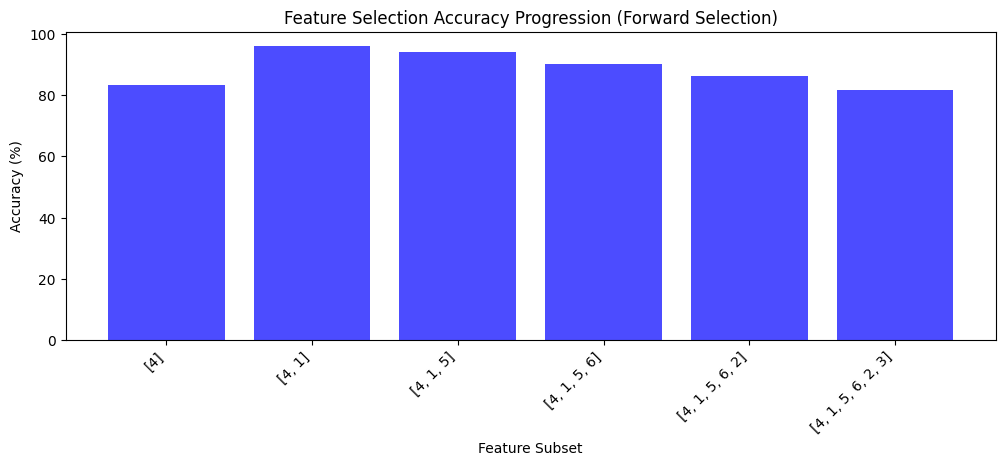

Running Backward Elimination...

Beginning search.

Using feature(s) [2, 3, 4, 5, 6] accuracy is 76.6%
Using feature(s) [1, 3, 4, 5, 6] accuracy is 84.6%
Using feature(s) [1, 2, 4, 5, 6] accuracy is 86.4%
Using feature(s) [1, 2, 3, 5, 6] accuracy is 71.6%
Using feature(s) [1, 2, 3, 4, 6] accuracy is 84.4%
Using feature(s) [1, 2, 3, 4, 5] accuracy is 86.4%

Feature set [1, 2, 4, 5, 6] was best, accuracy is 86.4%

Using feature(s) [2, 4, 5, 6] accuracy is 78.8%
Using feature(s) [1, 4, 5, 6] accuracy is 90.2%
Using feature(s) [1, 2, 5, 6] accuracy is 74.4%
Using feature(s) [1, 2, 4, 6] accuracy is 87.6%
Using feature(s) [1, 2, 4, 5] accuracy is 88.6%

Feature set [1, 4, 5, 6] was best, accuracy is 90.2%

Using feature(s) [4, 5, 6] accuracy is 82.6%
Using feature(s) [1, 5, 6] accuracy is 75.6%
Using feature(s) [1, 4, 6] accuracy is 93.4%
Using feature(s) [1, 4, 5] accuracy is 94.2%

Feature set [1, 4, 5] was best, accuracy is 94.2%

Using feature(s) [4, 5] accuracy is 86.4%
Using feature(s

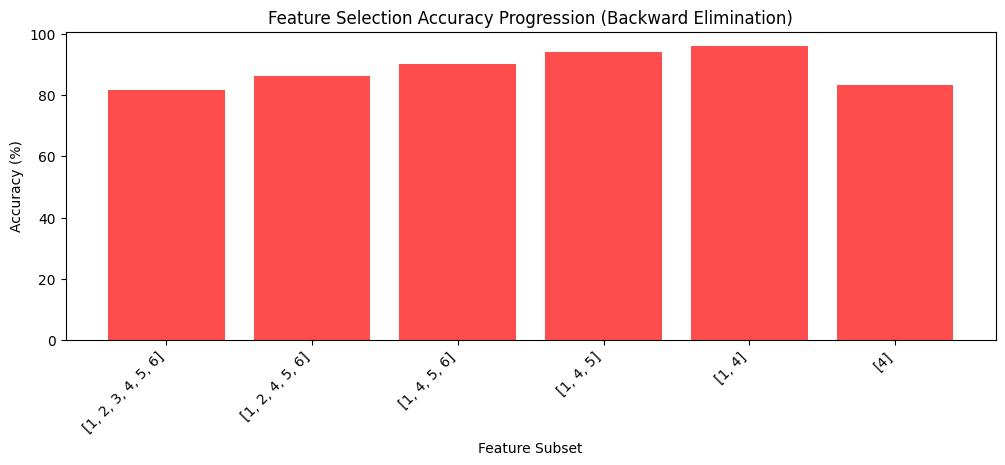

([1, 4], 96.0)

In [ ]:
# Cargar los datos del archivo
filename = "CS170_Small_Data__47.txt"
data = load_data(filename)

# Ejecutar Forward Selection y graficar
print("Running Forward Selection...")
run_and_plot(data, "Forward Selection", forward_selection, 'b')

# Ejecutar Backward Elimination y graficar
print("Running Backward Elimination...")
run_and_plot(data, "Backward Elimination", backward_elimination, 'r')

Running Forward Selection...

Beginning search.

Using feature(s) [1] accuracy is 67.8%
Using feature(s) [2] accuracy is 65.8%
Using feature(s) [3] accuracy is 68.9%
Using feature(s) [4] accuracy is 67.8%
Using feature(s) [5] accuracy is 66.9%
Using feature(s) [6] accuracy is 70.1%
Using feature(s) [7] accuracy is 69.3%
Using feature(s) [8] accuracy is 69.9%
Using feature(s) [9] accuracy is 68.0%
Using feature(s) [10] accuracy is 68.5%
Using feature(s) [11] accuracy is 65.9%
Using feature(s) [12] accuracy is 67.8%
Using feature(s) [13] accuracy is 69.4%
Using feature(s) [14] accuracy is 68.8%
Using feature(s) [15] accuracy is 67.3%
Using feature(s) [16] accuracy is 69.5%
Using feature(s) [17] accuracy is 66.5%
Using feature(s) [18] accuracy is 67.9%
Using feature(s) [19] accuracy is 68.7%
Using feature(s) [20] accuracy is 68.1%
Using feature(s) [21] accuracy is 68.4%
Using feature(s) [22] accuracy is 67.6%
Using feature(s) [23] accuracy is 70.1%
Using feature(s) [24] accuracy is 67.8%


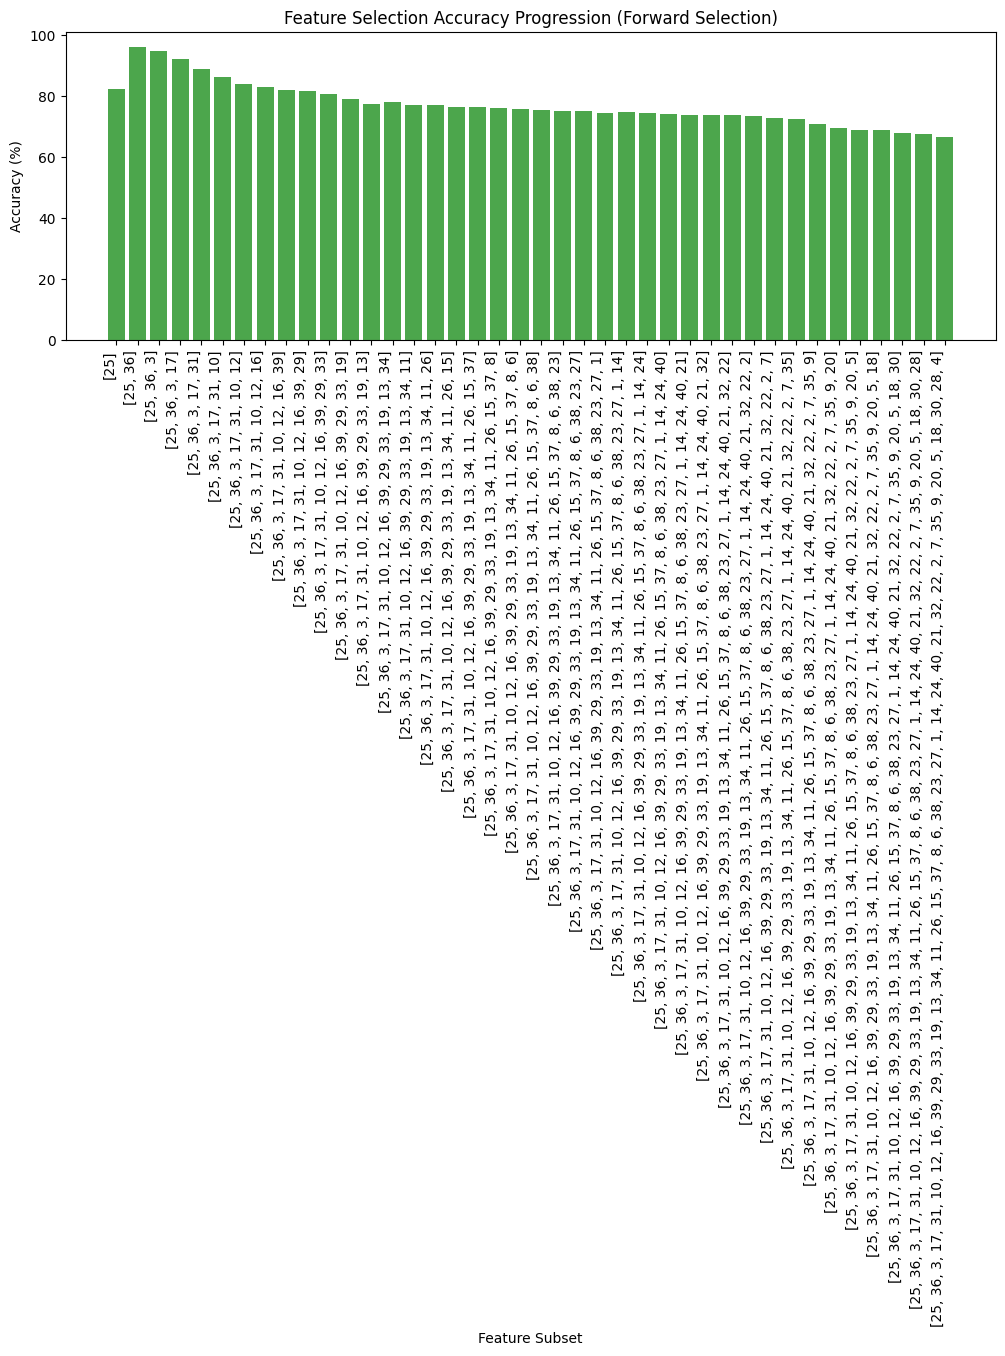

([25, 36], 96.2)

In [ ]:
# Cargar los datos del archivo
filename = "CS170_Large_Data__47.txt"
data = load_data(filename)

# Ejecutar Forward Selection y graficar
print("Running Forward Selection...")
run_and_plot(data, "Forward Selection", forward_selection, 'g')

Running Backward Elimination...

Beginning search.

Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] accuracy is 67.0%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] accuracy is 68.2%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] accuracy is 66.8%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] accuracy is 67.4%
Using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] accuracy is 68.7%
Using feature(s) [1, 2, 3, 4

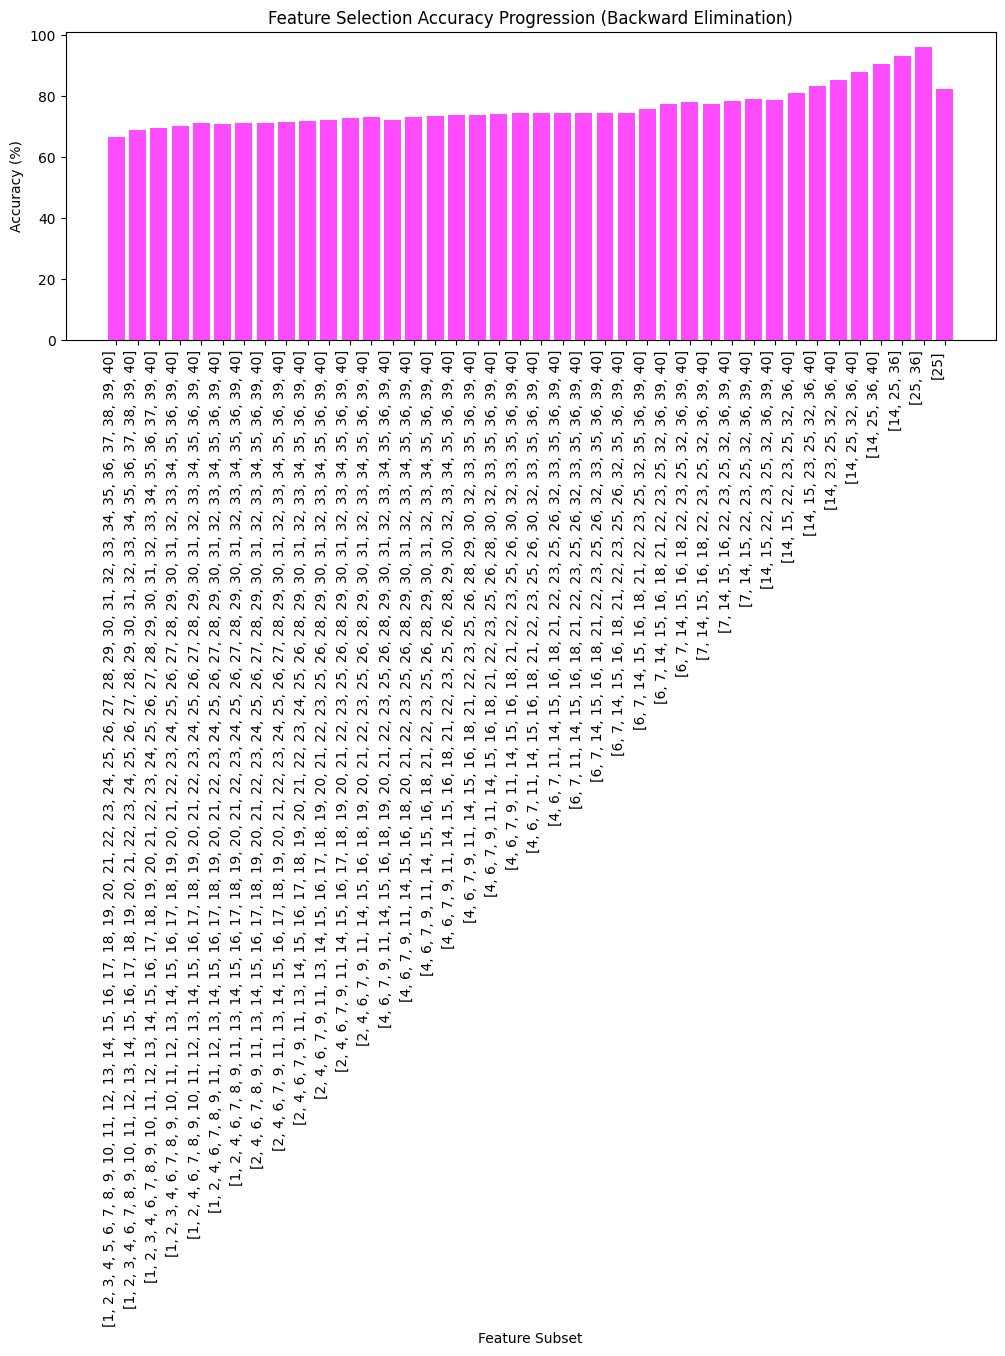

([25, 36], 96.2)

In [ ]:
filename = "CS170_Large_Data__47.txt"
data = load_data(filename)
# Ejecutar Backward Elimination y graficar
print("Running Backward Elimination...")
run_and_plot(data, "Backward Elimination", backward_elimination, 'magenta')